**Heart Disease Prediction**
1. Decision Tree Classifier
2. Random Forest Classifier

> Dataset: Fedesoriano

> Author: Abishek B

In [223]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
fedesoriano_heart_failure_prediction_path = kagglehub.dataset_download('fedesoriano/heart-failure-prediction')

print('Data source import complete.')


Using Colab cache for faster access to the 'heart-failure-prediction' dataset.
Data source import complete.


#Load and check for proper data

**Load** the Data

In [224]:
import pandas as pd
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [225]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [226]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

**Check** for null values and duplicated rows

In [227]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [228]:
df.duplicated().sum()

np.int64(0)

# Exploratary Data Analysis

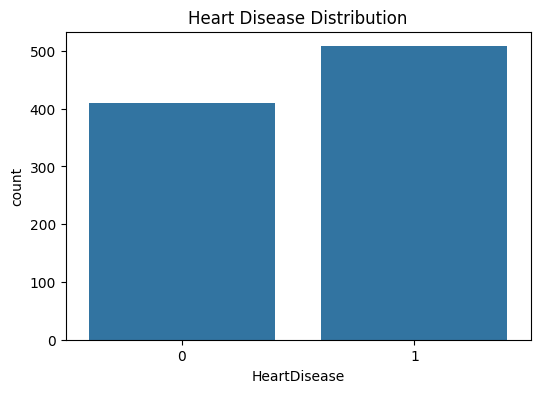

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Class Balance
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="HeartDisease")
plt.title("Heart Disease Distribution")
plt.show()

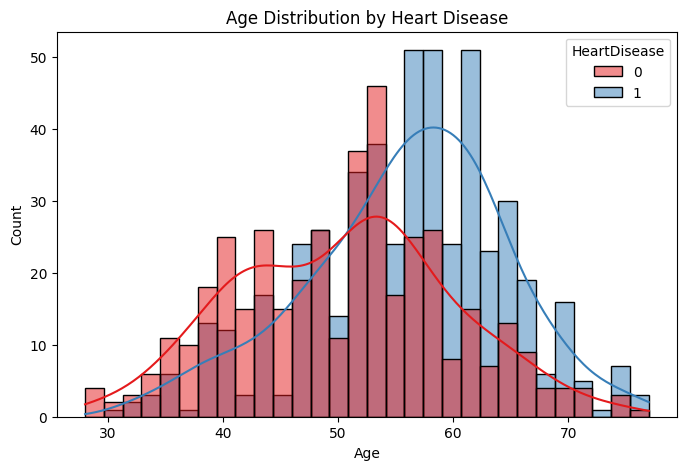

In [230]:
# 2. Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="HeartDisease", kde=True, palette="Set1", bins=30)
plt.title("Age Distribution by Heart Disease")
plt.show()

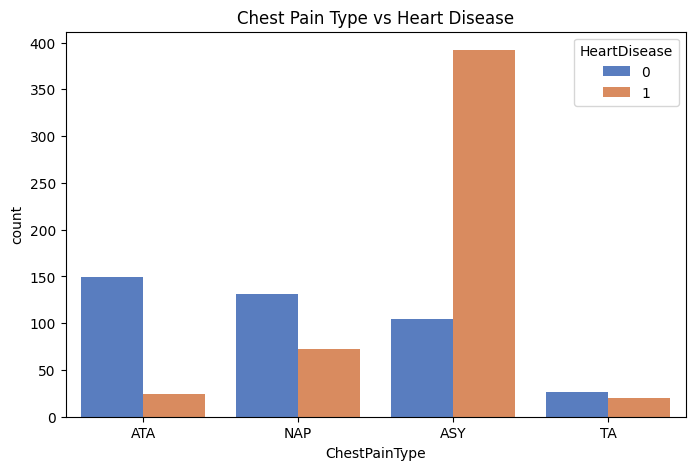

In [231]:
# 3. Chest Pain vs Heart Disease
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="ChestPainType", hue="HeartDisease", palette="muted")
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

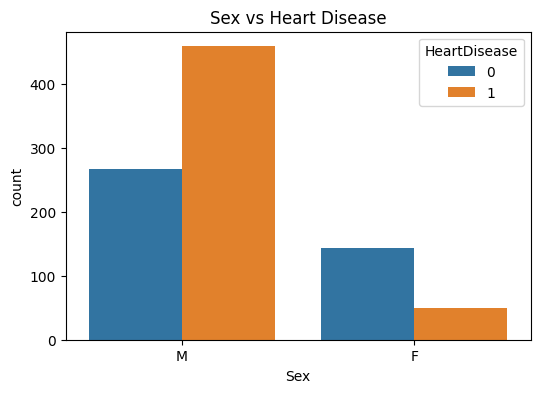

In [232]:
# 4. Sex vs Heart Disease
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sex", hue="HeartDisease")
plt.title("Sex vs Heart Disease")
plt.show()

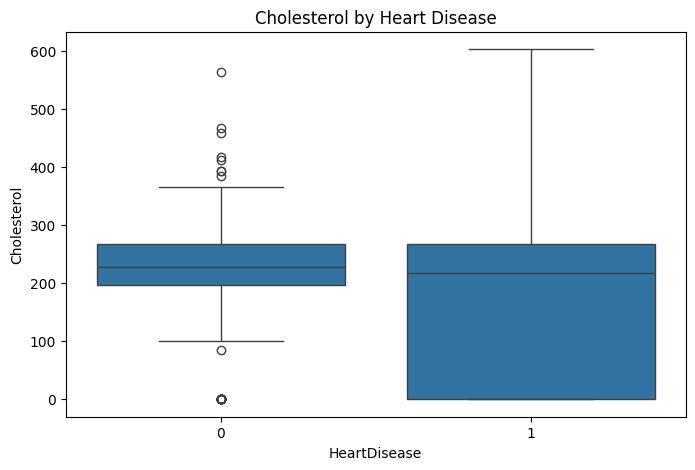

In [233]:
# 5. Cholesterol vs Heart Disease
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="HeartDisease", y="Cholesterol")
plt.title("Cholesterol by Heart Disease")
plt.show()

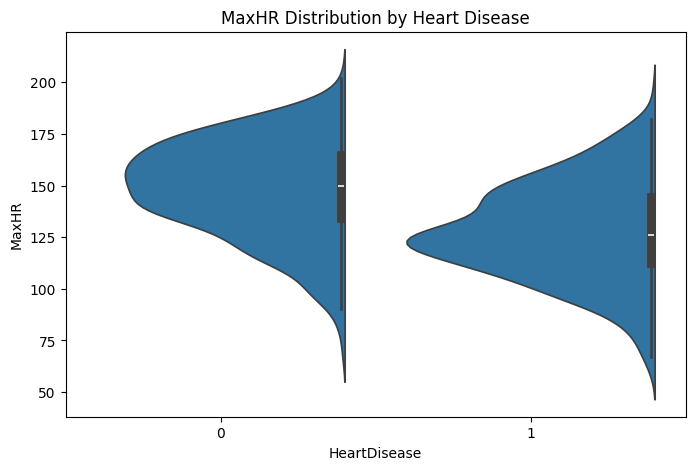

In [234]:
# 6. MaxHR vs Heart Disease
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="HeartDisease", y="MaxHR", split=True)
plt.title("MaxHR Distribution by Heart Disease")
plt.show()

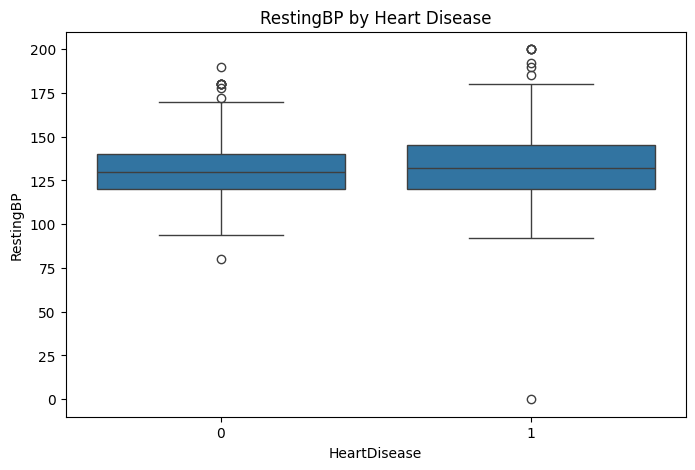

In [235]:
# 7. RestingBP vs Heart Disease
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="HeartDisease", y="RestingBP")
plt.title("RestingBP by Heart Disease")
plt.show()

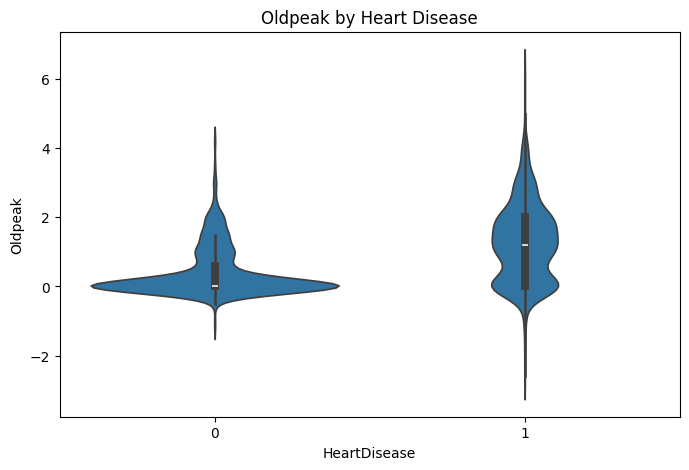

In [236]:
# 8. Oldpeak vs Heart Disease
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="HeartDisease", y="Oldpeak")
plt.title("Oldpeak by Heart Disease")
plt.show()

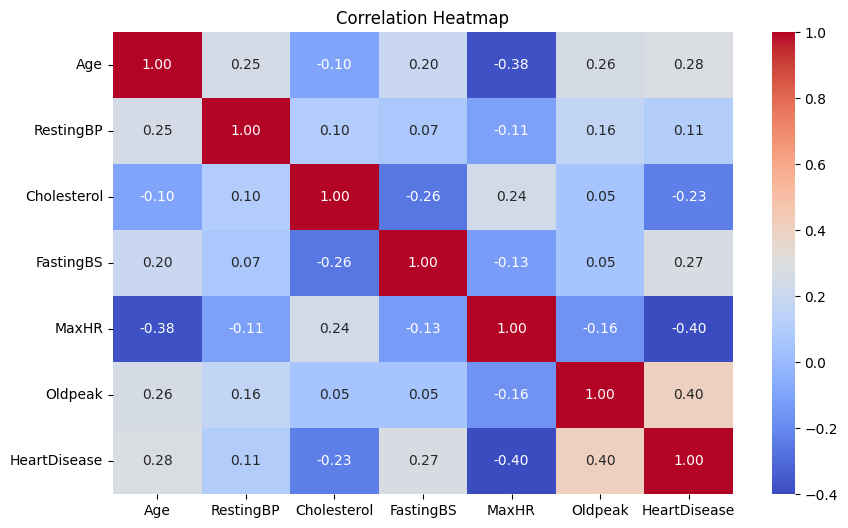

In [237]:
# 9. Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

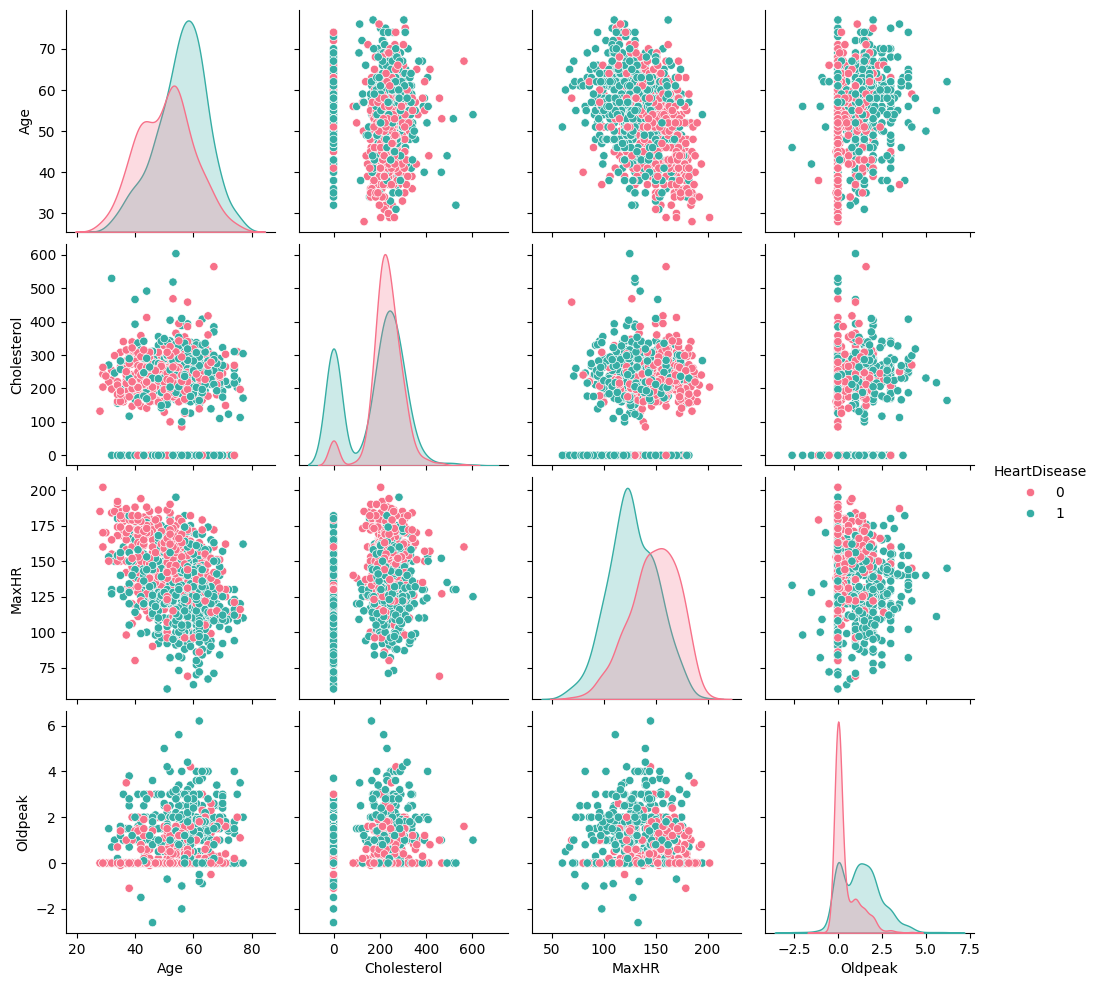

In [238]:
# 10. Pairplot (only key numeric features)
sns.pairplot(df[["Age", "Cholesterol", "MaxHR", "Oldpeak", "HeartDisease"]],
             hue="HeartDisease", palette="husl")
plt.show()

# Feature Engineering

In [239]:
df.select_dtypes(include = "object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


**One Hot Encoding**

In [240]:
df_encoded = pd.get_dummies(data = df, drop_first = True)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


**Final Dataset**

In [241]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


# Train - Test Split

In [242]:
X = df_encoded.drop("HeartDisease", axis = 1)
y = df_encoded["HeartDisease"]
print(X, y)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
0     40        140          289          0    172      0.0   True   
1     49        160          180          0    156      1.0  False   
2     37        130          283          0     98      0.0   True   
3     48        138          214          0    108      1.5  False   
4     54        150          195          0    122      0.0   True   
..   ...        ...          ...        ...    ...      ...    ...   
913   45        110          264          0    132      1.2   True   
914   68        144          193          1    141      3.4   True   
915   57        130          131          0    115      1.2   True   
916   57        130          236          0    174      0.0  False   
917   38        138          175          0    173      0.0   True   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                 True              False             False   
1                False           

**SMOTE**

In [243]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [244]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=101)
X_train, y_train = smote.fit_resample(X_train, y_train)

**Cross Validation**

In [245]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
def test_check_res():
      cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

      acc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
      print("Accuracy:", acc_scores.mean())

      prec_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="precision")
      print("Precision:", prec_scores.mean())

      rec_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
      print("Recall:", rec_scores.mean())

# Decision Tree Classifier

In [246]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes = 10, splitter="random", min_samples_split=20)

In [247]:
model.fit(X_train, y_train)
#test_check_res()

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_split=20,
                       splitter='random')

In [248]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

**Results**

Accuracy:  0.8695652173913043
Recall:  0.9019607843137255
Precision:  0.8679245283018868
[0.         0.         0.09991323 0.03228433 0.         0.
 0.015003   0.02397342 0.02810648 0.         0.02690547 0.
 0.07459238 0.         0.6992217 ]


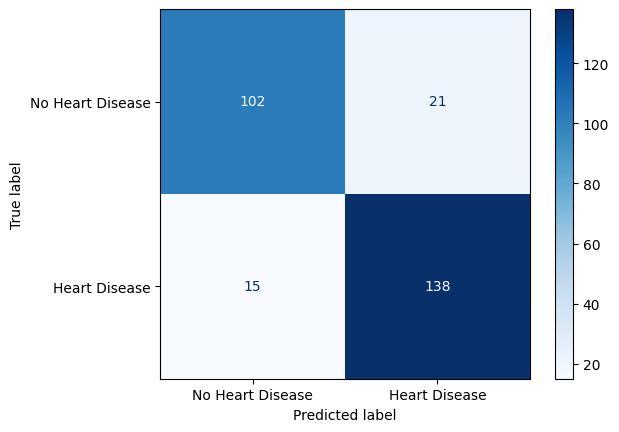

In [249]:
y_final_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_final_pred))
print("Recall: ", recall_score(y_test, y_final_pred))
print("Precision: ", precision_score(y_test, y_final_pred))

ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=["No Heart Disease", "Heart Disease"],
    cmap=plt.cm.Blues
)

print(model.feature_importances_)

Tree **View**

[Text(0.5, 0.9, 'x[14] <= 0.785\ngini = 0.5\nsamples = 710\nvalue = [355, 355]'),
 Text(0.3125, 0.7, 'x[12] <= 0.882\ngini = 0.311\nsamples = 364\nvalue = [70, 294]'),
 Text(0.40625, 0.8, 'True  '),
 Text(0.25, 0.5, 'x[8] <= 0.12\ngini = 0.446\nsamples = 137\nvalue = [46, 91]'),
 Text(0.125, 0.3, 'x[7] <= 0.273\ngini = 0.37\nsamples = 98\nvalue = [24, 74]'),
 Text(0.0625, 0.1, 'gini = 0.286\nsamples = 81\nvalue = [14, 67]'),
 Text(0.1875, 0.1, 'gini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(0.375, 0.3, 'x[6] <= 0.415\ngini = 0.492\nsamples = 39\nvalue = [22, 17]'),
 Text(0.3125, 0.1, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.4375, 0.1, 'gini = 0.495\nsamples = 29\nvalue = [13, 16]'),
 Text(0.375, 0.5, 'gini = 0.189\nsamples = 227\nvalue = [24, 203]'),
 Text(0.6875, 0.7, 'x[2] <= 83.437\ngini = 0.29\nsamples = 346\nvalue = [285, 61]'),
 Text(0.59375, 0.8, '  False'),
 Text(0.5625, 0.5, 'x[3] <= 0.172\ngini = 0.431\nsamples = 35\nvalue = [11, 24]'),
 Text(0.5, 0.3, 'gin

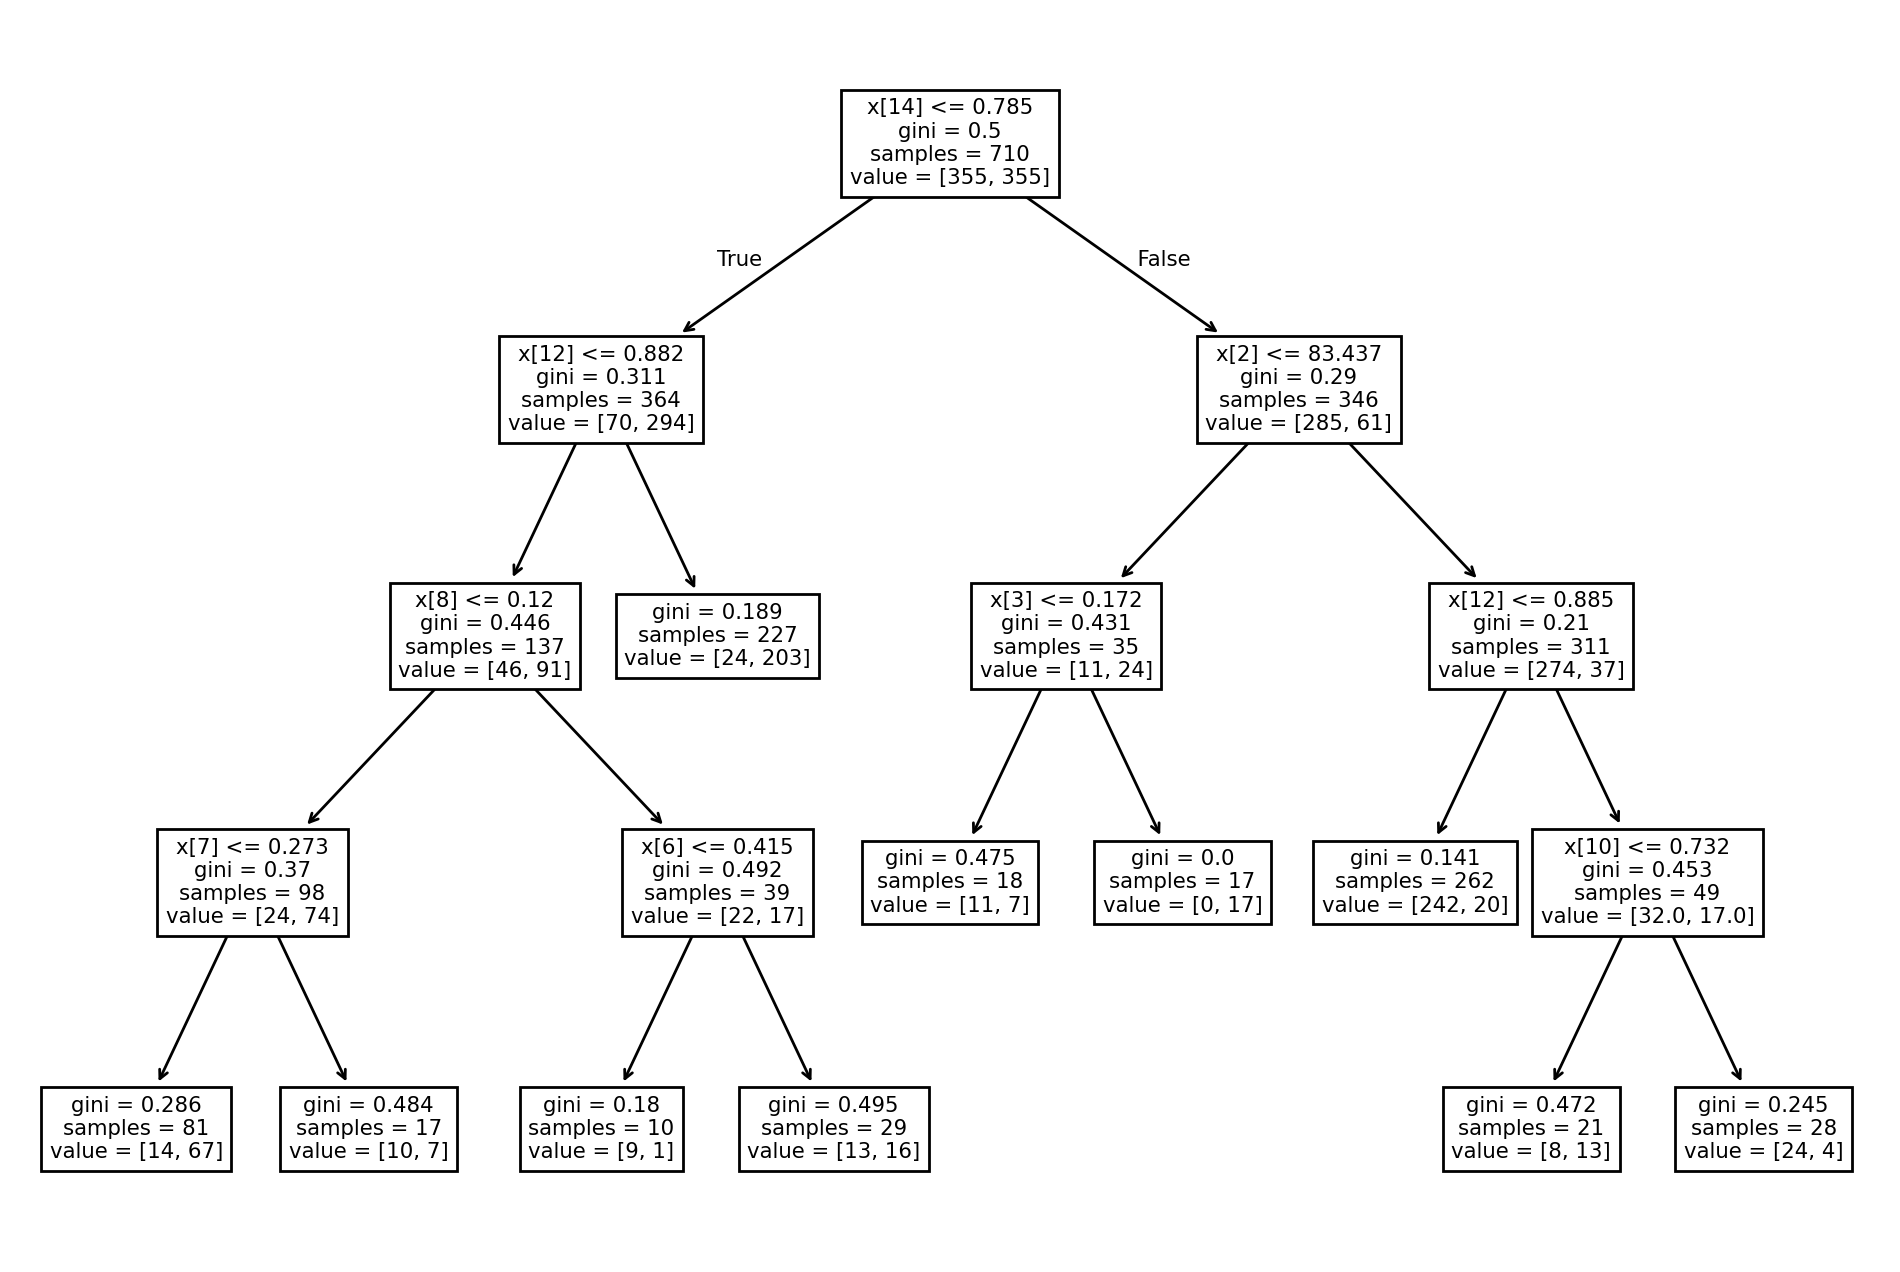

In [250]:
from sklearn.tree import plot_tree
plt.figure(figsize = (12, 8), dpi = 200)
plot_tree(model)

Result **DecisionTree**:

**1. Accuracy: 86%**

2. Recall: 90%
3. Precision: 86%




*Without Cross Vaidation:*

**1. Accuracy: 86%**

2. Recall: 83%

# Random Forest Model

In [251]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=90, random_state=101, max_depth=100, min_samples_split = 4, max_leaf_nodes=50)

In [252]:
model.fit(X_train, y_train)
#test_check_res()

RandomForestClassifier(max_depth=100, max_leaf_nodes=50, min_samples_split=4,
                       n_estimators=90, random_state=101)

**Results**

Accuracy:  0.8623188405797102
Recall:  0.8954248366013072
Precision:  0.8616352201257862
[0.07538816 0.05564848 0.09438253 0.02184343 0.0849419  0.10592282
 0.0266745  0.06319103 0.03125771 0.01283639 0.01255306 0.00748994
 0.08295729 0.10601559 0.21889716]


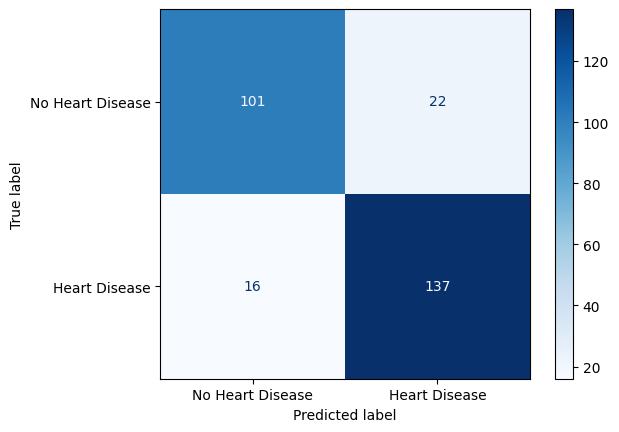

In [253]:
y_final_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_final_pred))
print("Recall: ", recall_score(y_test, y_final_pred))
print("Precision: ", precision_score(y_test, y_final_pred))

ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=["No Heart Disease", "Heart Disease"],
    cmap=plt.cm.Blues
)

print(model.feature_importances_)

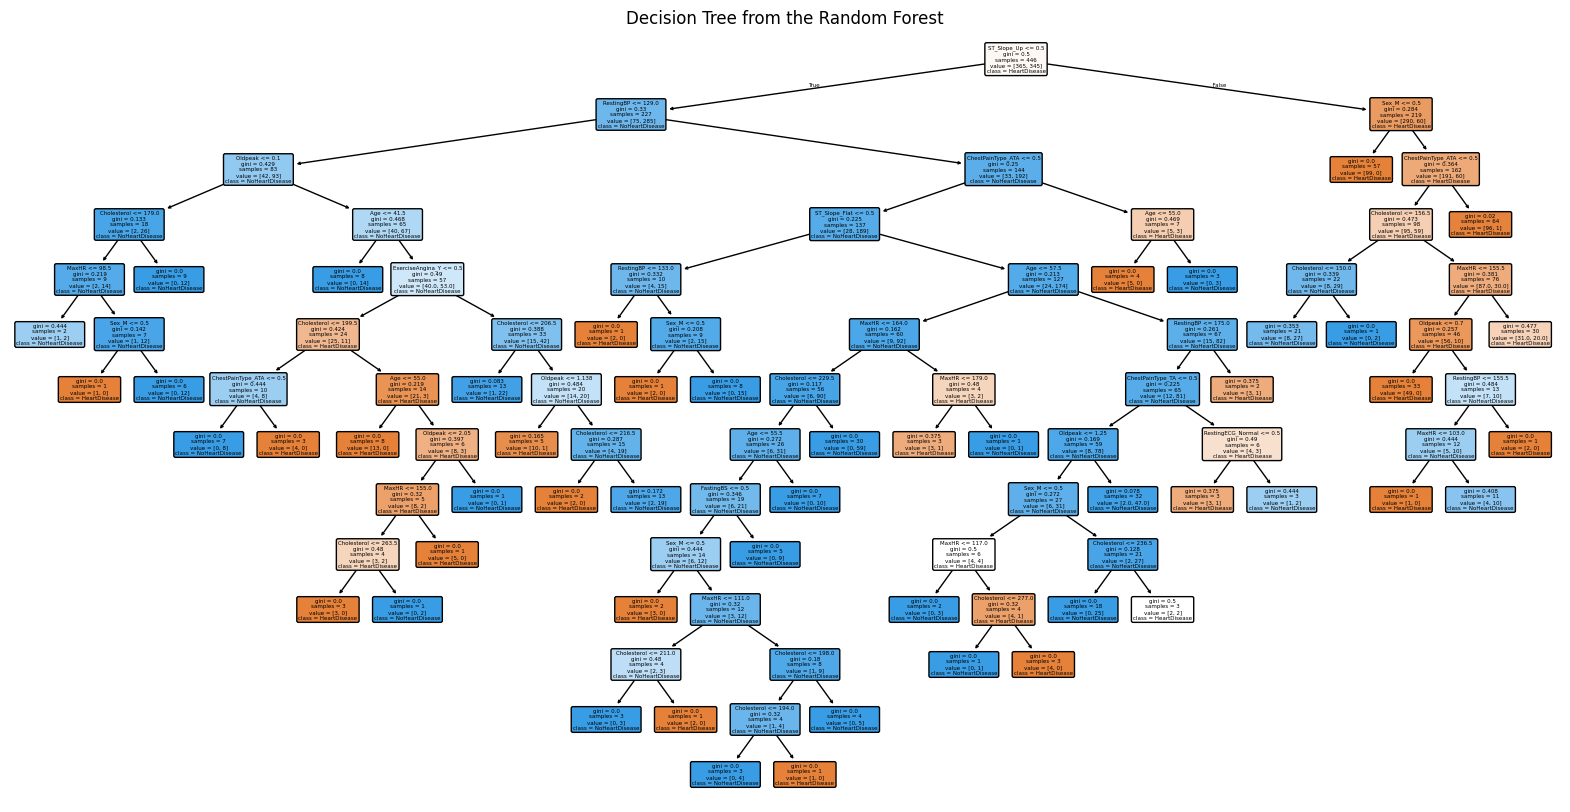

In [254]:
tree = model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree,
          feature_names=X.columns,
          class_names=["HeartDisease", "NoHeartDisease"],
          filled=True,
          rounded=True)
plt.title("Decision Tree from the Random Forest")
plt.show()

Result **RandomForest**:

**1. Accuracy: 86%**

2. Recall: 89%
3. Precision: 86%

*Without Cross Validation:*

**1. Accuracy: 86%**

2. Recall: 83%

# Discussion

Discussion on **Challenges**

Updating and Optimising for the best hyperparameters was a little challenging.
Thankfully, there where no cleaning up of data.

Discussion on **Improvements**

This model cannot be used for real world applications as wrong results can mislead users, hence cannot be implemented for Healthcare Industry.

The EDA shows comparison of HeartDisease on different parameters like cholestral, Age, Sex, etc.,